<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/dz_08_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задачи урок 8:

1 Опишите метод describe. Что необходимо по логике первым сделать с
предоставленными данными в статистике?

2 Что можно сделать дальше?

3 Следующий шаг…



1. Опишите метод describe. Что необходимо по логике первым сделать с предоставленными данными в статистике?



 Первое, что можно сделать с предоставленными данными, это посмотреть количество наблюдений (count),
  среднее (mean), стандартное отклонение (std), максимальное (max)и минимальное значения (min). Python-библиотека Pandas включает метод describe, который позволяет взглянуть на описательную статистику числовых данных: data.describe()

In [2]:
import pandas as pd
import numpy as np


df = pd.DataFrame({'f1' : np.random.randn(1000),
                   'f2' : np.random.randn(1000)*3+4,
                   'f3' : np.random.randn(1000)*0.1 -3})
df.describe()


,f1,f2,f3
count,1000.000000,1000.000000,1000.000000
mean,-0.039530,3.929897,-3.001495
std,0.976353,3.058996,0.103526
min,-3.069643,-5.065557,-3.297006
25%,-0.721989,1.997207,-3.075387
50%,-0.021559,3.890119,-3.004013
75%,0.636558,6.084762,-2.937131
max,3.691954,12.564447,-2.697767


2 Нормальный закон распределения является простым и удобным для дальнейшего исследования. Чтобы проверить имеет ли тот или иной атрибут нормальное распределение, можно воспользоваться двумя критериями Python-библиотеки scipy с модулем stats


 создадим нормальное распределение с помощью стандарнтых методов
Допустим, вы владеете магазином, в котором товары сбываются по нормальному закону со средним 500 и стандартным отклонением 100. Для визуализации кейса можно использовать следующий код:


<Axes: ylabel='Density'>

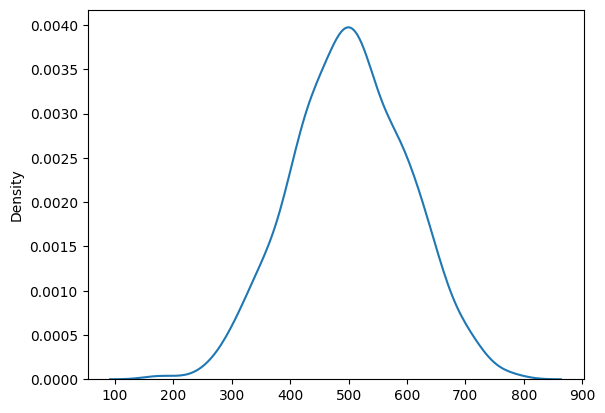

In [3]:
import seaborn as sns
from scipy.stats import norm
distr = norm(500,100)
sns.kdeplot(distr.rvs(1000))

колокообразный график указывет на возможность описать распределение как близкое к нормальному

(array([110., 307., 247., 168.,  84.,  37.,  28.,  10.,   3.,   3.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.59044299,  1.54462417,  2.49880535,  3.45298653,  4.40716771,
         5.36134889,  6.31553007,  7.26971125,  8.22389243,  9.17807361,
        10.13225479, 11.08643597, 12.04061715, 12.99479833, 13.94897951,
        14.90316069, 15.85734187, 16.81152305, 17.76570423, 18.71988542,
        19.6740666 ]),
 <BarContainer object of 20 artists>)

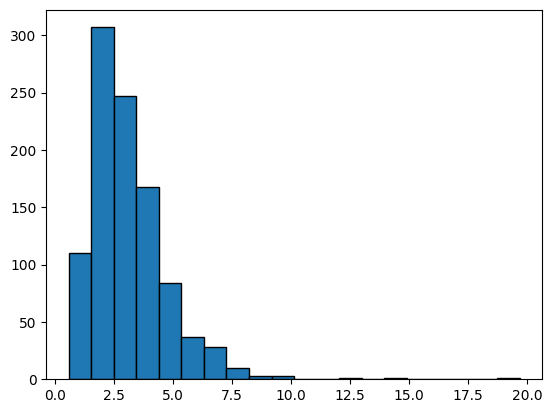

In [4]:
# визуальный метод. создание гистограммы. не нормальное распределение

import math
import numpy as np
from scipy. stats import lognorm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed (1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm. rvs (s=.5, scale=math. exp (1), size=1000)

#create histogram to visualize values in dataset
plt.hist (lognorm_dataset, edgecolor='black', bins=20)

**создать график QQ**

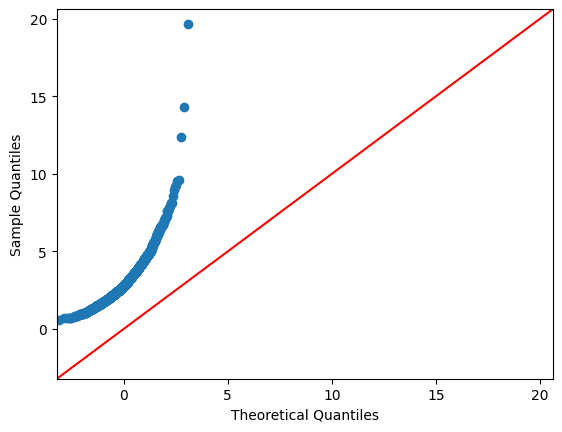

In [1]:
import math
import numpy as np
from scipy. stats import lognorm
import statsmodels.api as sm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed (1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm. rvs (s=.5, scale=math. exp (1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = sm. qqplot (lognorm_dataset, line='45')

plt.show()

Если точки на графике ложатся примерно на прямую диагональную линию, мы обычно предполагаем, что набор данных имеет нормальное распределение.

**3 T-тест (или тест Стьюдента) решает задачу доказательства наличия различий средних значений количественной переменной в случае, когда имеются лишь две сравниваемые группы. Модуль stats Python-библиотеки scipy также предоставляет t-тест**

T-тест – это тест, который сравнивает два средних значения, и сообщает нам, отличаются они друг от друга или нет. T-тест также известен как T-тест Стьюдента, и он также показывает, насколько значительны различия. Другими словами, это дает нам представление о том, могли ли эти различия возникнуть случайно.
Существует три основных типа Т-теста:

Т-тест независимых выборок: этот тест используется для сравнения средних значений для двух групп.
Парный выборочный T-тест: этот тест используется для сравнения средних значений из одной и той же группы в разное время (например, с разницей в один год).
Одиночный образец T-теста: этот тест используется для проверки среднего значения отдельной группы по сравнению с признанным средним.
Предположим, что нам нужно проверить, отличается ли рост мужчин в популяции от роста женщин в целом. Таким образом, мы возьмем образец из совокупности и используем Т-тест, чтобы проверить, является ли результат значимым.

Мы будем следовать инструкциям, приведенным ниже:

Шаг 1: определение нулевой и альтернативной гипотезы.
Шаг 2. Сбор образцов данных.
Шаг 3: Определение доверительного интервала и степеней свободы.
Шаг 4: Расчет T-статистики.
Шаг 5: Расчет критического Т-значения по Т-распределению.
Шаг 6: Сравнение критических значений T с рассчитанными значениями T-статистики.



**Определение нулевой и альтернативной гипотез**

Необходимо начать с определения нулевой и альтернативной гипотез. В общем, нулевая гипотеза выражает, что две тестируемые популяции не имеют статистически значимых различий. С другой стороны, альтернативная гипотеза будет выражать одно из присутствующих. Для этого примера мы можем заключить следующие утверждения:

Нулевая гипотеза: рост мужчин и женщин одинаков.
Альтернативная гипотеза: рост мужчин отличается от роста женщин.
Источник: https://pythonpip.ru/osnovy/t-test-na-python

In [3]:
# Importing the required libraries and packages
import numpy as np
from scipy import stats
# Defining two random distributions
# Sample Size
N = 10
# Gaussian distributed data with mean = 2 and var = 1
x = np.random.randn(N) + 2
# Gaussian distributed data with mean = 0 and var = 1
y = np.random.randn(N)
# Calculating the Standard Deviation
# Calculating the variance to get the standard deviation
var_x = x.var(ddof = 1)
var_y = y.var(ddof = 1)
# Standard Deviation
SD = np.sqrt((var_x + var_y) / 2)
print("Standard Deviation =", SD)
# Calculating the T-Statistics
tval =(x.mean() - y.mean()) /(SD * np.sqrt(2 / N))
# Comparing with the critical T-Value
# Degrees of freedom
dof = 2 * N - 2
# p-value after comparison with the T-Statistics
pval = 1 - stats.t.cdf( tval, df = dof)
print("t = " + str(tval))
print("p = " + str(2 * pval))
## Cross Checking using the internal function from SciPy Package
tval2, pval2 = stats.ttest_ind(x, y)
print("t = " + str(tval2))
print("p = " + str(pval2))
#Источник: https://pythonpip.ru/osnovy/t-test-na-python

Standard Deviation = 1.2149699436850523
t = 3.8195047884894864
p = 0.0012556101477962933
t = 3.8195047884894873
p = 0.0012556101477961632
